In [55]:
from src.infer_models import infer
from src.preprocess import preprocess
from src.archs_models import *
# from src.opts_models import dectree
import os
import sys
import pathlib
from pathlib import Path

import numpy as np
from numpy.core.shape_base import block
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Sans Serif"],
    "text.latex.preamble": r'\usepackage{amsmath,amsthm,amsfonts,amssymb}',
})  # Avant Garde,

np.set_printoptions(precision=4)
np.set_printoptions(formatter={'float': "{:0.4f}".format})


# Ensure path is referenced to this script's root
# thisdir = os.path.dirname(__file__)
thisdir = Path.cwd()
# os.chdir(thisdir)
os.chdir(sys.path[0])
print(os.getcwd())

figs_dir = os.path.join(thisdir, 'figs/')
if not os.path.isdir(figs_dir):
    os.makedirs(figs_dir)

# os.chdir(r'./ai534ias/ia1/')

# Generate the path to the file relative to your python script:
# script_location = Path(__file__).absolute().parent
# print(script_location)
# file_location = script_location / 'file.yaml'
# file = file_location.open()


/home/somefunagba/ias/ia4


In [56]:
# Data Preprocessing

# do major feature engineering - 0 | 1
doengr = 0
donormalize = 0

# Train
rawdata = 'csvs/mushroom-train.csv'
traindata, train_id = preprocess(rawdata, donormalize=donormalize, istrain=1,
                                 traininfo=None, doengr=doengr)

# View final data entering the model.
# print(traindata['X'])

# Dev
rawdata = 'csvs/mushroom-val.csv'
devdata, dev_id = preprocess(rawdata, donormalize=donormalize, istrain=0,
                             traininfo=traindata, doengr=doengr)


# Test
rawdata = 'kaggle/mushroom-test-X.csv'
testdata, test_id = preprocess(rawdata, donormalize=donormalize, istrain=0,
                               traininfo=traindata, doengr=doengr)


data size (rows,columns) (4500, 118)
data size (rows,columns) (1600, 118)
data size (rows,columns) (2023, 117)
Key error [price]: No price-column in test-data
['cap-face=b', 'cap-face=c', 'cap-face=f', 'cap-face=k', 'cap-face=s', 'cap-face=x', 'cap-surface=f', 'cap-surface=g', 'cap-surface=s', 'cap-surface=y', 'cap-color=b', 'cap-color=c', 'cap-color=e', 'cap-color=g', 'cap-color=n', 'cap-color=p', 'cap-color=r', 'cap-color=u', 'cap-color=w', 'cap-color=y', 'bruises?=f', 'bruises?=t', 'odor=a', 'odor=c', 'odor=f', 'odor=l', 'odor=m', 'odor=n', 'odor=p', 'odor=s', 'odor=y', 'gill-attachment=a', 'gill-attachment=f', 'gill-spacing=c', 'gill-spacing=w', 'gill-size=b', 'gill-size=n', 'gill-color=b', 'gill-color=e', 'gill-color=g', 'gill-color=h', 'gill-color=k', 'gill-color=n', 'gill-color=o', 'gill-color=p', 'gill-color=r', 'gill-color=u', 'gill-color=w', 'gill-color=y', 'stalk-shape=e', 'stalk-shape=t', 'stalk-root=?', 'stalk-root=b', 'stalk-root=c', 'stalk-root=e', 'stalk-root=r', 'stalk

In [57]:
DX = traindata['X']
DY = traindata['Y']
x_names = traindata['feats']
rows, cols = DX.shape


In [58]:
w = np.ones((rows, 1))/rows
best_splitdec = search_bestsplit(DX, DY, x_names, gini_class, w, m=0, N=rows)
for k in best_splitdec:
    print(k, ":", best_splitdec[k])

best_splitdec = search_bestsplit(DX, DY, x_names, ent_class, w, m=0, N=rows)
for k in best_splitdec:
    print(k, ":", best_splitdec[k])

name : odor=n
id : 27
val : 1
ig : 0.1905175077976537
name : odor=n
id : 27
val : 0
ig : 0.2562501156767557


In [59]:

# T = [110] 
# dmax = [1] 

# T = [26] 
# dmax = [2] 

# T = [5] 
# dmax = [5] 

T = [10, 20, 30, 40, 50]
dmax = [1, 2, 5]

# set m = 0 : no feature resampling
# m = cols
# m = int(np.sqrt(cols))
m = 0

mdlforests = {'d': [], 'forest': []}
for max_d in dmax:
    print(f"d={max_d}")
    mdltrees = {'T': [], 'facc_train': [], 'facc_dev': []}
    for numoftrees in T:
        forest = AdaBoost(numoftrees)
        forest.build_ensemble(DX, DY, x_names, metric_class=ent_class,
                         feature_samplesize=m, max_depth=max_d, min_size=3, inprints=0)
        # forest.dectrees[-1].print()
        print(f"(train)")
        ytrain_hat, acc_train, misstrain = forest.infer_ensemble(
            traindata['X'], traindata['Y'])
        print(f"(val)")
        ydev_hat, acc_dev, missdev = forest.infer_ensemble(
            devdata['X'], devdata['Y'])
        mdltrees['T'].append(numoftrees)
        mdltrees['facc_train'].append(acc_train)
        mdltrees['facc_dev'].append(acc_dev)
    mdlforests['d'].append(max_d)
    mdlforests['forest'].append(mdltrees)
pass


d=1
(train)
AdaBoost => class accuracy: 0.98, misses: 111
(val)
AdaBoost => class accuracy: 0.97, misses: 49
(train)
AdaBoost => class accuracy: 0.98, misses: 85
(val)
AdaBoost => class accuracy: 0.97, misses: 42
(train)
AdaBoost => class accuracy: 1, misses: 10
(val)
AdaBoost => class accuracy: 0.99, misses: 8
(train)
AdaBoost => class accuracy: 1, misses: 6
(val)
AdaBoost => class accuracy: 1, misses: 4
(train)
AdaBoost => class accuracy: 1, misses: 2
(val)
AdaBoost => class accuracy: 1, misses: 2
d=2
(train)
AdaBoost => class accuracy: 0.99, misses: 29
(val)
AdaBoost => class accuracy: 0.99, misses: 13
(train)
AdaBoost => class accuracy: 1, misses: 6
(val)
AdaBoost => class accuracy: 1, misses: 6
(train)
AdaBoost => class accuracy: 1, misses: 0
(val)
AdaBoost => class accuracy: 1, misses: 0
(train)
AdaBoost => class accuracy: 1, misses: 0
(val)
AdaBoost => class accuracy: 1, misses: 0
(train)
AdaBoost => class accuracy: 1, misses: 0
(val)
AdaBoost => class accuracy: 1, misses: 0
d=5

Boosted Trees Varying Max-Depth Plot...	
Done.



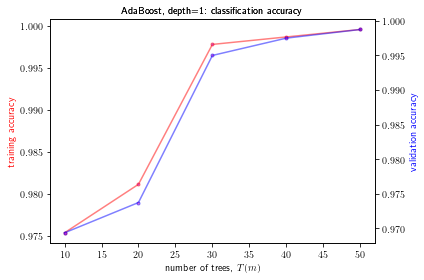

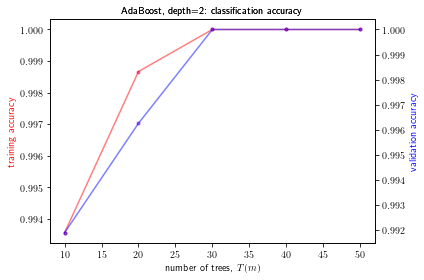

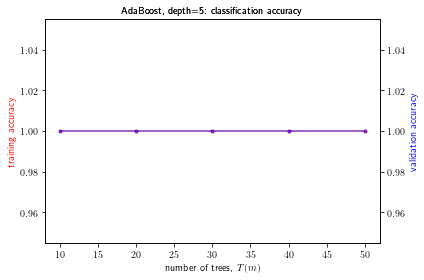

In [60]:
# Plots
print('Boosted Trees Varying Max-Depth Plot...\t')

x_T = []
x_m = []
y_trainacc = []
y_devacc = []

forestsd = mdlforests['forest']
ds = mdlforests['d']
for mdls_d, d in zip(forestsd, ds):
    fig1, ax1 = plt.subplots(figsize=(6, 4), tight_layout=True)
    ax2 = ax1.twinx()
    x_T = mdls_d['T']
    y_trainacc = mdls_d['facc_train']
    y_devacc = mdls_d['facc_dev']
    #
    ax1.plot(x_T, y_trainacc, marker='.', color='r',
             markerfacecolor='m', alpha=0.5, label=f"train")
    ax1.set_ylabel(f'training accuracy', color='r')
    ax1.set_xlabel(f"number of trees, $T(m)$")
    # ax1.legend(loc=0)
    #
    ax2.plot(x_T, y_devacc, marker='.', color='b',
             markerfacecolor='m', alpha=0.5, label=f"dev")
    ax2.set_ylabel(f'validation accuracy', color='b')

    # ax2.legend(loc=0)
    ax1.set_title(
        f"AdaBoost, depth={d}: classification accuracy", color='k', weight='bold', size=10)
    ax2.set_title(
        f"AdaBoost, depth={d}: classification accuracy", color='k', weight='bold', size=10)
    # plt.ion
    fig1.savefig(
        figs_dir + f"figadaboost_{d}_pt3_traindev.pdf", bbox_inches='tight')


print('Done.\n')


In [61]:
# x = sample_population(10, 4)
# x.shape[0]
# x.shape
# import numpy as np
# np.random.choice(5, 5, replace=True, p=[0.2, 0.2, 0.2, 0.2, 0.2])
# m = int(np.sqrt(cols))
# print(m)

# change d to observe, individual tree performance for a particular d
# FOR TEST
T = 5
d = 5

# set m = 0 : no feature resampling
m = 0
forest = AdaBoost(T)
forest.build_ensemble(DX, DY, x_names, metric_class=ent_class,
                 feature_samplesize=m, max_depth=d, min_size=3, inprints=1)
# forest.dectrees[-1].print()

# KAGGLE Test prediction INFERENCE
Yhat_test = forest.infer_ensemble(testdata['X'])

test_result = {'ID': test_id, 'Class': Yhat_test.flatten()}
dftest = pd.DataFrame(data=test_result)
dftest.to_csv(
    f"kaggle/mushroom-test-X-trees-{T}-depth-{d}_boost_result.csv", index=False)


OOB Estimate
class accuracy: 0.97, misses: 116
class accuracy: 0.97, misses: 116
Normalization: 1.0
tree=1

OOB Estimate
class accuracy: 0.96, misses: 193
class accuracy: 0.96, misses: 193
Normalization: 1.0
tree=2

OOB Estimate
class accuracy: 0.95, misses: 223
class accuracy: 0.95, misses: 223
Normalization: 1.0
tree=3

OOB Estimate
class accuracy: 1, misses: 14
class accuracy: 1, misses: 14
Normalization: 1.0
tree=4

OOB Estimate
class accuracy: 0.65, misses: 1578
class accuracy: 0.65, misses: 1578
Normalization: 1.0
tree=5



In [62]:
# print(dftest.to_latex(index=False))